In [1]:
from skimage.metrics import structural_similarity, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import cv2

1. Загрузите изображение в оттенках серого sar_1_gray.jpg.

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

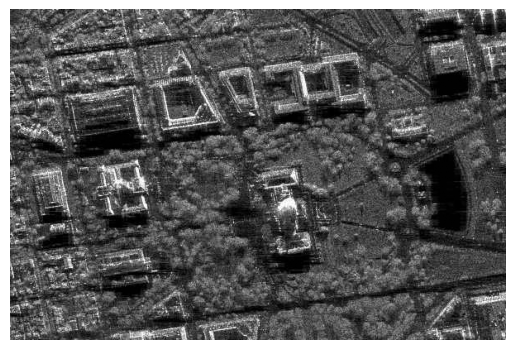

In [14]:
image = cv2.imread('sar_1_gray.jpg')
image_gray = cv2.imread("sar_1_gray.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image_gray, cmap="gray")
plt.axis("off")

2. Постройте гистограмму

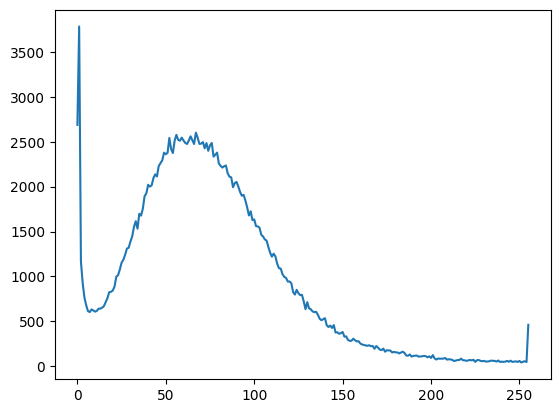

In [4]:
hist = cv2.calcHist([image_gray], [0], None, [256], [0,256])

plt.plot(hist)

3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.

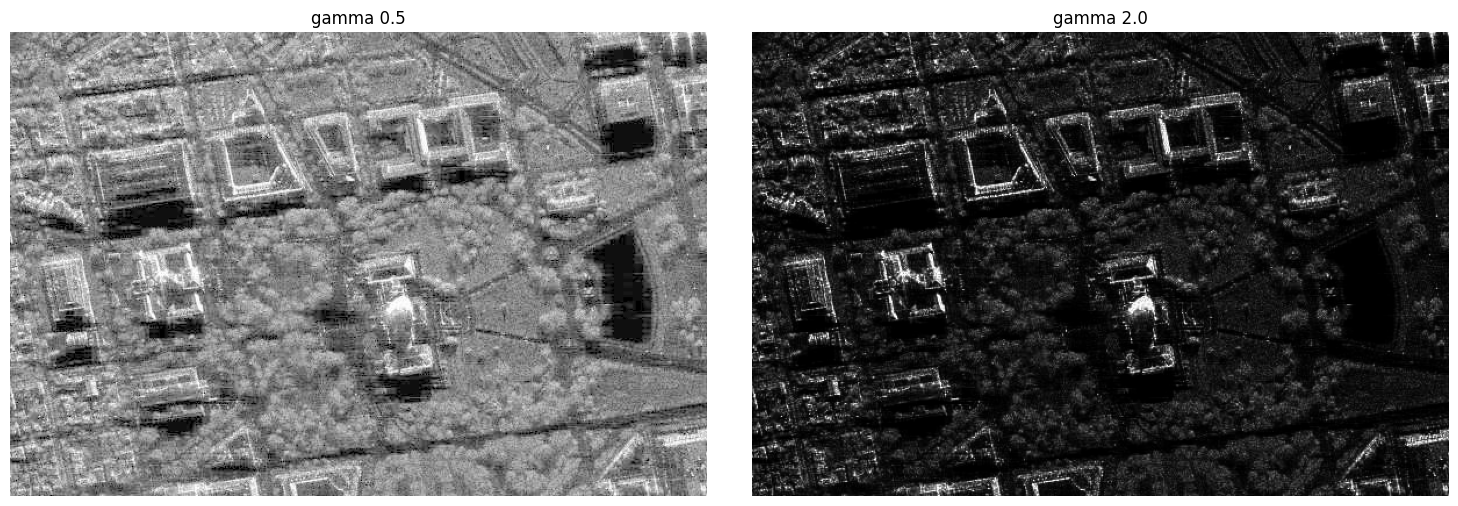

In [9]:
def gamma_correction(image, gamma):
    corrected_pixel = np.power(image / 255.0, gamma) * 255
    return corrected_pixel.astype(np.uint8)

gamma_05 = gamma_correction(image, 0.5)
gamma_20 = gamma_correction(image, 2.0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gamma_05, cv2.COLOR_BGR2RGB))
plt.title('gamma 0.5')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gamma_20, cv2.COLOR_BGR2RGB))
plt.title('gamma 2.0')
plt.axis('off')

plt.tight_layout()
plt.show()

4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [12]:
image_gray_05 = cv2.cvtColor(gamma_05, cv2.COLOR_BGR2GRAY)
image_gray_20 = cv2.cvtColor(gamma_20, cv2.COLOR_BGR2GRAY)

(ssim_bright, diff_bright) = structural_similarity(image_gray, image_gray_05, full=True)
(ssim_dark, diff_dark) = structural_similarity(image_gray, image_gray_20, full=True)

mse_bright = mean_squared_error(image_gray, image_gray_05)
mse_dark = mean_squared_error(image_gray, image_gray_20)

diff_bright = (diff_bright * 255).astype("uint8")
diff_dark = (diff_dark * 255).astype("uint8")

print("Результаты сравнения:")
print(f"Gamma=0.5: SSIM = {ssim_bright:.4f}; MSE = {mse_bright:.4f}")
print(f"Gamma=2.0: SSIM = {ssim_dark:.4f}; MSE = {mse_dark:.4f}")

Результаты сравнения:
Gamma=0.5: SSIM = 0.7875; MSE = 3250.4291
Gamma=2.0: SSIM = 0.5270; MSE = 2383.7636


5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

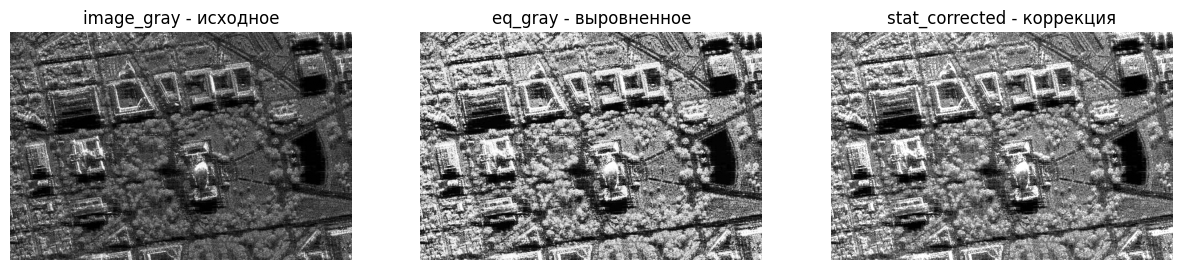

In [13]:
eq_gray = cv2.equalizeHist(image_gray)

mean_src = image_gray.mean()
std_src = image_gray.std()

mean_ref = eq_gray.mean()
std_ref = eq_gray.std()

stat_corrected = ( (image_gray - mean_src) * (std_ref/std_src) + mean_ref )
stat_corrected = np.clip(stat_corrected, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 12))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap="gray")
plt.title('image_gray - исходное')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap="gray")
plt.title('eq_gray - выровненное')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(stat_corrected, cmap="gray")
plt.title('stat_corrected - коррекция')
plt.axis("off")

6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

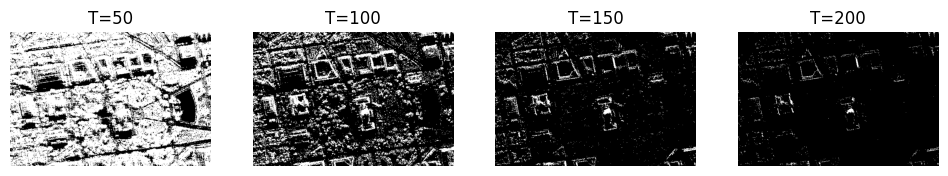

In [18]:
thresh_values = [50, 100, 150, 200]

plt.figure(figsize=(12, 8))

for i, t in enumerate(thresh_values):
  _, thresh = cv2.threshold(image_gray, t, 255, cv2.THRESH_BINARY)
  plt.subplot(len(thresh_values), 4, 1+i)
  plt.imshow(thresh, cmap='gray')
  plt.title(f"T={t}")
  plt.axis("off")
plt.show()

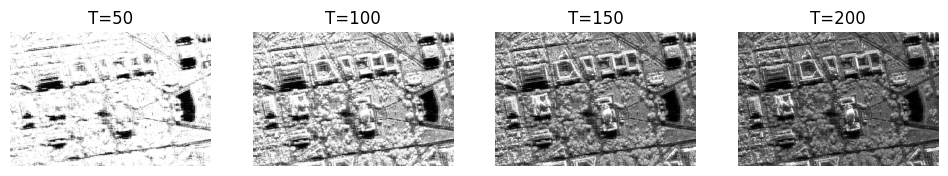

In [20]:
thresh_values = [50, 100, 150, 200]

plt.figure(figsize=(12, 8))

for i, t in enumerate(thresh_values):
  _, thresh = cv2.threshold(image_gray, t, 255, cv2.THRESH_TRUNC)
  plt.subplot(len(thresh_values), 4, 1+i)
  plt.imshow(thresh, cmap='gray')
  plt.title(f"T={t}")
  plt.axis("off")
plt.show()